***
# Outliers
***

In [1]:
# Numerical arrays.
import numpy as np

# Plotting.
import matplotlib.pyplot as plt

# Statistics.
import scipy.stats as ss

## What is an outlier?
We have to be careful - extreme values are not necessarily due to error.

## The Normal Distribution - Scaling
  
$$ \frac{1}{\sqrt{2 \pi \sigma^2 }} $$

  

In [2]:
# The number pi.
np.pi

3.141592653589793

In [3]:
# Square root of 2.
np.sqrt(2)

1.4142135623730951

In [4]:
# An approximation, but very close to 2.
1.4142135623730951**2

2.0000000000000004

In [5]:
# Called the scale in numpy.
sigma = 1.0
sigma

1.0

In [6]:
# This is just a number, close to 0.4.
1.0 / np.sqrt(2 * np.pi * sigma**2)

0.3989422804014327

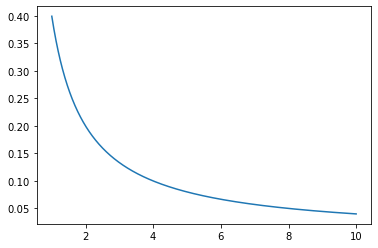

In [7]:
# Varying values of sigma for comparison.
sigma_vals = np.linspace(1.0, 10.0, 1000)

# Plot the formula.
plt.plot(sigma_vals, 1.0 / np.sqrt(2 * np.pi * sigma_vals**2));

## The Normal Distribution - the $e$ part
$$ e^{-\frac{(x - \mu)^2}{2 \sigma^2}} $$
See: https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html

In [8]:
# Just a number, like pi.
np.e

2.718281828459045

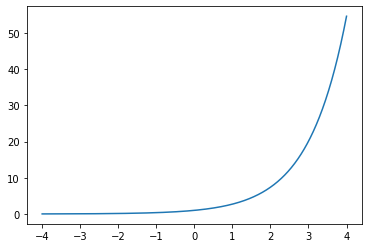

In [9]:
# Range of x values for plotting.
x = np.linspace(-4.0, 4.0, 1000)

# Plot of e^x - built into numpy as np.exp.
plt.plot(x, np.exp(x));

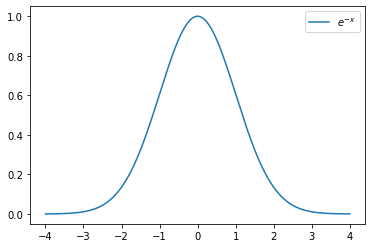

In [10]:
# Range of x values.
x = np.linspace(-4.0, 4.0, 1000)

# e to the minus x.
plt.plot(x, np.exp(-(x**2 / 2)), label=r'$e^{-x}$')

# Uncomment this to see it is equal to 1 / e^x.
# plt.plot(x, 1.0 / np.exp(x), label=r'$1.0 / e^x$')

# Absolute legend.
plt.legend();

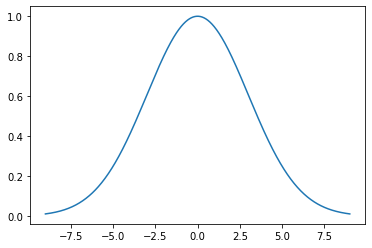

In [11]:
# These are involved in the exponent.
# Note we fix these values in subsequent plots.
mu, sigma = 0.0, 3.0

# Range of x values.
x = np.linspace(-9.0, 9.0, 1000)

# Plot of full e part of normal pdf.
plt.plot(x, np.exp(-((x - mu)**2 / (2 * sigma**2))));

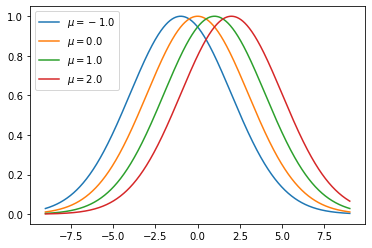

In [12]:
# Changing values of mu.

# Set some initial values, we'll ignore this mu.
mu, sigma = 0.0, 3.0

# x values for plot.
x = np.linspace(-9.0, 9.0, 1000)

# Plot the function for several different values of mu.
for mu in [-1.0, 0.0, 1.0, 2.0]:
    plt.plot(x, np.exp(-((x - mu)**2 / (2 * sigma**2))), label=rf'$\mu = {mu}$')

# Add a legend.
plt.legend();

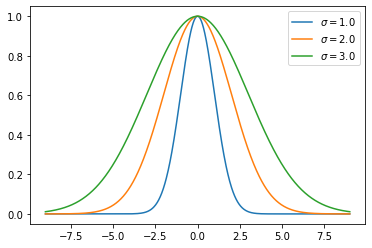

In [13]:
# Changing values of sigma.
# Note that sigma also occurs in the first part involving the square root.

# Set some initial values, we'll ignore this sigma.
mu, sigma = 0.0, 3.0

# x values for plot.
x = np.linspace(-9.0, 9.0, 1000)

# Plot the function for several different values of sigma.
for sigma in [1.0, 2.0, 3.0]:
    plt.plot(x, np.exp(-((x - mu)**2 / (2 * sigma**2))), label=rf'$\sigma = {sigma}$')

# Add a legend.
plt.legend();

# Normal Distribution - All Together
$$ \frac{1}{\sqrt{2 \pi \sigma^2 }} e^{-\frac{(x - \mu)^2}{2 \sigma^2}} $$

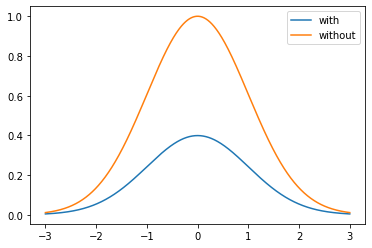

In [14]:
# Set mu and sigma.
mu, sigma = 0.0, 1.0

# Range of x values.
x = np.linspace(-3.0, 3.0, 1000)

# First part, with the square root.
part1 = 1.0 / np.sqrt(2 * np.pi * sigma**2)
# Second part, with the e.
part2 = np.exp(-((x - mu)**2 / (2 * sigma**2)))
# The output is the product.
y = part1 * part2

# Plot x and y.
plt.plot(x, y, label='with')
# Show without scaling by first part..
plt.plot(x, part2, label='without')

plt.legend();

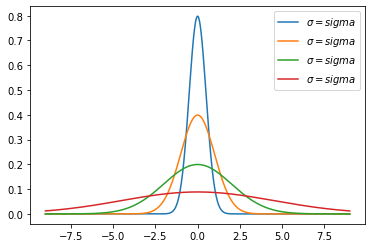

In [15]:
# Changing values of sigma.
# Note that sigma occurs in part 1 and part 2.
# So, the height of the curve is also affected.

# Set initial mu and sigma.
mu, sigma = 0.0, 1.0

# Range of x values.
x = np.linspace(-9.0, 9.0, 1000)

# Different values of sigma.
for sigma in [0.5, 1.0, 2.0, 4.5]:
    # First part, with the square root.
    part1 = 1.0 / np.sqrt(2 * np.pi * sigma**2)
    # Second part, with the e.
    part2 = np.exp(-((x - mu)**2 / (2 * sigma**2)))
    # The output is the product.
    y = part1 * part2
    # Plot x and y.
    plt.plot(x, y, label='$\sigma = {sigma}$')

plt.legend();

# Percentiles
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html

In [16]:
# Picking random values on the curve.
np.random.normal(0.0, 1.0)

-1.1256451679728856

In [17]:
# Picking random values on the curve - the max of 10000000.
# Would you describe it as an outlier?
np.random.normal(0.0, 1.0, 10000000).max()

5.444508742619595

In [18]:
# The x value at the 99th percentile.
# 99% of all randomly generated values will be below this.
ss.norm().ppf(0.99)

2.3263478740408408

In [19]:
# The 50th percentile - the mean in this case.
ss.norm().ppf(0.50)

0.0

In [20]:
# The percentile of 0.0 on the x axis.
ss.norm().cdf(0.0)

0.5

In [21]:
# The probability of generating a value less than 3.0 and greater than -3.0.
ss.norm().cdf(3.0) - ss.norm().cdf(-3.0)

0.9973002039367398

In [22]:
# Six sigma, where sigma is 1.0 and mu is 0.0.
ss.norm().cdf(6.0) - ss.norm().cdf(-6.0)

0.9999999980268246

# Quartiles

In [23]:
# 3rd quartile - the 75th percentile.
ss.norm().ppf(0.75)

0.6744897501960817

In [24]:
# 2nd quartile - the 50th percentile.
ss.norm().ppf(0.5)

0.0

In [25]:
# 1st quartile - the 25th percentile.
ss.norm().ppf(0.25)

-0.6744897501960817

Note the quartile is usually the range, not the point.

# Box Plots

In [26]:
# Read in the morley data.
data = np.genfromtxt('data/morley.csv', skip_header=1, delimiter=',', deletechars='"')

# Remove the first column.
data = data[:,1:]

In [27]:
# Select the data for the first experiment.
exper_1 = data[:20, 2]

exper_1

array([ 850.,  740.,  900., 1070.,  930.,  850.,  950.,  980.,  980.,
        880., 1000.,  980.,  930.,  650.,  760.,  810., 1000., 1000.,
        960.,  960.])

In [28]:
# Select the data for the second experiment.
exper_2 = data[20:40, 2]

exper_2

array([960., 940., 960., 940., 880., 800., 850., 880., 900., 840., 830.,
       790., 810., 880., 880., 830., 800., 790., 760., 800.])

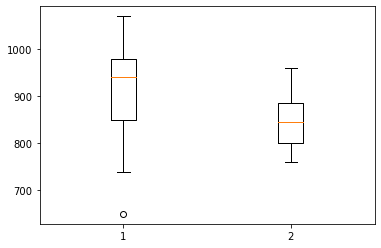

In [29]:
# Create a box plot.
plt.boxplot(np.array([exper_1, exper_2]).T);

In [30]:
# A quick way to get the five experiments in different columns.
data[:,2].reshape(5, 20).T

array([[ 850.,  960.,  880.,  890.,  890.],
       [ 740.,  940.,  880.,  810.,  840.],
       [ 900.,  960.,  880.,  810.,  780.],
       [1070.,  940.,  860.,  820.,  810.],
       [ 930.,  880.,  720.,  800.,  760.],
       [ 850.,  800.,  720.,  770.,  810.],
       [ 950.,  850.,  620.,  760.,  790.],
       [ 980.,  880.,  860.,  740.,  810.],
       [ 980.,  900.,  970.,  750.,  820.],
       [ 880.,  840.,  950.,  760.,  850.],
       [1000.,  830.,  880.,  910.,  870.],
       [ 980.,  790.,  910.,  920.,  870.],
       [ 930.,  810.,  850.,  890.,  810.],
       [ 650.,  880.,  870.,  860.,  740.],
       [ 760.,  880.,  840.,  880.,  810.],
       [ 810.,  830.,  840.,  720.,  940.],
       [1000.,  800.,  850.,  840.,  950.],
       [1000.,  790.,  840.,  850.,  800.],
       [ 960.,  760.,  840.,  850.,  810.],
       [ 960.,  800.,  840.,  780.,  870.]])

# Inter-Quartile Range

In [31]:
exper_1

array([ 850.,  740.,  900., 1070.,  930.,  850.,  950.,  980.,  980.,
        880., 1000.,  980.,  930.,  650.,  760.,  810., 1000., 1000.,
        960.,  960.])

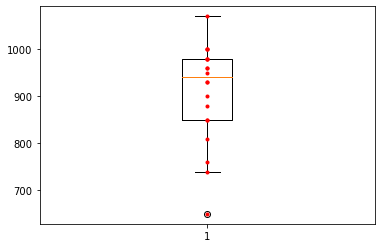

In [32]:
# Create a figure.
fig, ax = plt.subplots()

# Add the boxplot.
ax.boxplot(exper_1)

# Plots red dots at (1, value) for each value in exper_1.
ax.plot(np.ones(exper_1.shape), exper_1, 'r.');

In [33]:
# The values.
exper_1

array([ 850.,  740.,  900., 1070.,  930.,  850.,  950.,  980.,  980.,
        880., 1000.,  980.,  930.,  650.,  760.,  810., 1000., 1000.,
        960.,  960.])

In [34]:
# The values, but sorted.
np.sort(exper_1)

array([ 650.,  740.,  760.,  810.,  850.,  850.,  880.,  900.,  930.,
        930.,  950.,  960.,  960.,  980.,  980.,  980., 1000., 1000.,
       1000., 1070.])

In [35]:
# Calculate the mean - three ways.
exper_1.mean(), np.mean(exper_1), sum(exper_1) / len(exper_1)

(909.0, 909.0, 909.0)

In [36]:
# Median of exper_1.
np.median(exper_1)

940.0

In [37]:
# The median is the 50th percentile.
np.percentile(exper_1, 50)

940.0

In [38]:
# Upper quartile value.
q3 = np.percentile(exper_1, 75)

q3

980.0

In [39]:
# Median of the top half of values.
np.median(np.sort(exper_1)[10:])

980.0

In [40]:
# Upper quartile value.
q1 = np.percentile(exper_1, 25)

q1

850.0

In [41]:
# Median of the bottom half of values.
np.median(np.sort(exper_1)[:10])

850.0

In [42]:
# Inter-quartile range.
iqr = np.percentile(exper_1, 75) - np.percentile(exper_1, 25)

iqr

130.0

In [43]:
# Max upper whisker.
q3 + iqr

1110.0

In [44]:
# Min lower whisker.
q1 - iqr


720.0

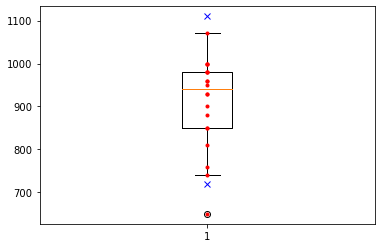

In [45]:
# Create a figure.
fig, ax = plt.subplots()

# Add the boxplot.
ax.boxplot(exper_1)

# Plots red dots at (1, value) for each value in exper_1.
ax.plot(np.ones(exper_1.shape), exper_1, 'r.')

# Add the max whisker lengths.
ax.plot([1.0, 1.0], [q1 - iqr, q3 + iqr], 'bx');

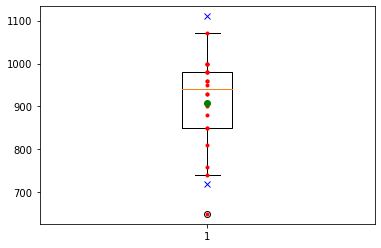

In [46]:
# Create a figure.
fig, ax = plt.subplots()

# Add the boxplot.
ax.boxplot(exper_1)

# Plots red dots at (1, value) for each value in exper_1.
ax.plot(np.ones(exper_1.shape), exper_1, 'r.')

# Add the max whisker lengths.
ax.plot([1.0, 1.0], [q1 - iqr, q3 + iqr], 'bx')

# Plot the mean.
ax.plot([1.0], [np.mean(exper_1)], 'go');


In [47]:
# Values above the mean.
exper_1[exper_1 > exper_1.mean()]

array([1070.,  930.,  950.,  980.,  980., 1000.,  980.,  930., 1000.,
       1000.,  960.,  960.])

In [48]:
# Values above the mean.
exper_1[exper_1 < exper_1.mean()]


array([850., 740., 900., 850., 880., 650., 760., 810.])

# Exercise 1
Remember to do these exercises in your own notebook in your assessment repository.

Create box plots on a single set of axes for all five experiments in the morley data set.

In [49]:
# Answer

# Select the data for the third experiment.
exper_3 = data[40:60, 2]

exper_3

array([880., 880., 880., 860., 720., 720., 620., 860., 970., 950., 880.,
       910., 850., 870., 840., 840., 850., 840., 840., 840.])

In [50]:
# Select the data for the fourth experiment.
exper_4 = data[60:80, 2]

exper_4

array([890., 810., 810., 820., 800., 770., 760., 740., 750., 760., 910.,
       920., 890., 860., 880., 720., 840., 850., 850., 780.])

In [51]:
# Select the data for the fifth experiment.
exper_5 = data[80:100, 2]

exper_5

array([890., 840., 780., 810., 760., 810., 790., 810., 820., 850., 870.,
       870., 810., 740., 810., 940., 950., 800., 810., 870.])

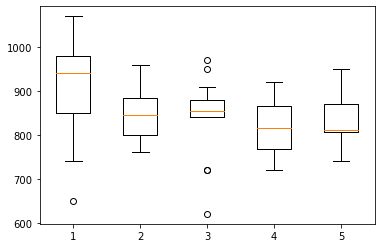

In [52]:
# Create a box plot.
plt.boxplot(np.array([exper_1, exper_2, exper_3, exper_4, exper_5]).T);

# Exercise 2
Remember to do these exercises in your own notebook in your assessment repository.

Create box plots for all of the numercial variables in Fisher's Iris Data Set.

## Answer

In [53]:
#getting Fisher's Iris dataset
import pandas as pd
import seaborn as sns
import numpy as np

irisdata = pd.read_csv("https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv")

In [54]:
#Showing all the numerical variables
irisdata.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


<AxesSubplot:xlabel='variety', ylabel='sepal.width'>

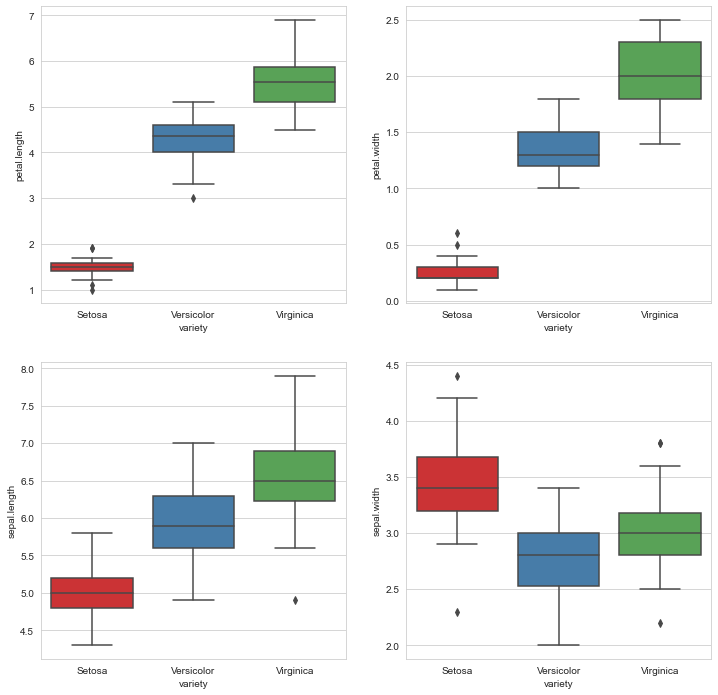

In [55]:
#Using matplotlib to create a figure consisting of four subplots.
#Using Seaborn's boxplot to gain insight into the distribution of the four features.

plt.figure(figsize = (12, 12))
sns.set_style('whitegrid')
sns.set_palette('Set1')
plt.subplot(2, 2, 1)
sns.boxplot(x = 'variety', y = 'petal.length', data = irisdata)
plt.subplot(2, 2, 2)
sns.boxplot(x = 'variety', y = 'petal.width', data = irisdata)
plt.subplot(2, 2, 3)
sns.boxplot(x = 'variety', y = 'sepal.length', data = irisdata)
plt.subplot(2, 2, 4)
sns.boxplot(x = 'variety', y= 'sepal.width', data = irisdata)

# A Data Set
In the next cell I am going to generate a set of numbers.

We will then plot and consider them.

In [56]:
# Create a series of x vectors.
xs = np.array([np.linspace(i, i + 2.0, 20) for i in range(10)])

In [57]:
# Create a corresponding series of y vectors.
ys = np.array([-1.0 * xs[i] + 2 * i for i in range(len(xs))])

# Add some noise.
ys = ys + np.random.normal(0.0, 1.0, ys.shape)

In [58]:
# Create global list of x and y values.
x = xs.flatten()
y = ys.flatten()

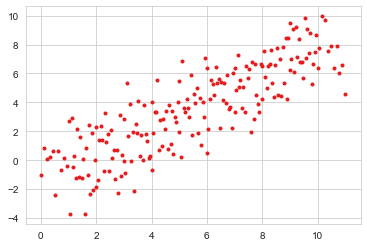

In [59]:
# Plot.
plt.plot(x, y, '.');

It looks like the points go from bottom left to top right.

Let's fit a best-fit straight line and see how it looks.

Best Fit Line
In the next cell I am going to generate a set of numbers.

We will then plot and consider them.

$y = mx + c$

In [60]:
# Best fit line slope and y intercept.
m, c = np.polyfit(x, y, 1)

In [61]:
# Create a steadily increasing x range for plotting.
xbestfit = np.linspace(x.min(), x.max(), 1000)
# Create corresponding y values form best fit line.
ybestfit = m * xbestfit + c

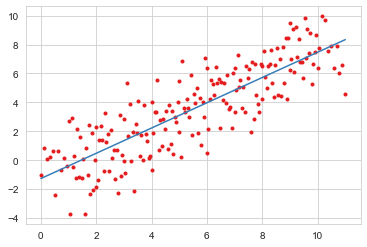

In [62]:
# Plot points.
plt.plot(x, y, '.')

# Plot line.
plt.plot(xbestfit, ybestfit);

# Colours

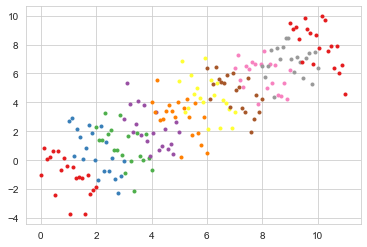

In [63]:
# Plot the same points, but now with a different colour for each range.
for i in range(len(xs)):
    plt.plot(xs[i], ys[i], '.')

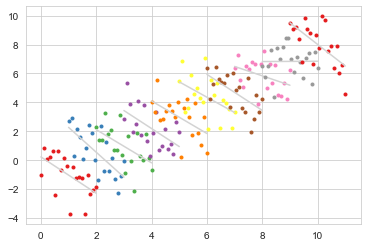

In [64]:
# Same plot but with best fit lines for each category.
for i in range(len(xs)):
    # Plot this category.
    plt.plot(xs[i], ys[i], '.')
    # Fit line to category.
    m, c = np.polyfit(xs[i], ys[i], 1)
    # Create steadily increasing x range for plot.
    xbestfit = np.linspace(xs[i].min(), xs[i].max(), 50)
    # Corresponding y values based on best fit line.
    ybestfit = m * xbestfit + c
    # Plot best fit line for category.
    plt.plot(xbestfit, ybestfit, color='lightgrey');

See Simpson's Paradox.

# Exercise 3
Remember to do these exercises in your own notebook in your assessment repository.

Adapt the above code and plots so that the overall plot is inversely propertional and the individual groups are directly proportional.

## Answer 

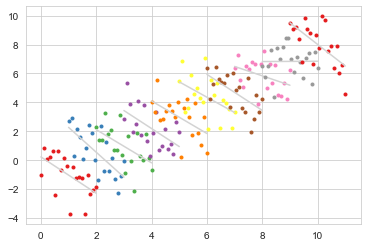

In [65]:
# Adapting the code/plot so that the overall plot is inverseiy proportional and the individual groups
#are directly proportional by inverting axis
for i in range(len(xs)):
    # Plot this category.
    plt.plot(xs[i], ys[i], '.')
    # Fit line to category.
    m, c = np.polyfit(xs[i], ys[i], 1)
    # Create steadily increasing x range for plot.
    xbestfit = np.linspace(xs[i].min(), xs[i].max(), 50)
    # Corresponding y values based on best fit line.
    ybestfit = m * xbestfit + c
    # Plot best fit line for category.
    plt.plot(xbestfit, ybestfit, color='lightgrey');
    plt.gca().invert_xaxis()

Resources:
1. https://vincentarelbundock.github.io/Rdatasets/articles/data.html
2. https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html
3. https://www.kaggle.com/code/tedmundho/iris-data-visualization-with-ml
4. https://rstudio-pubs-static.s3.amazonaws.com/207397_62c118a8adbd472dbc3e9740c6b9b302.html
5. https://www.angela1c.com/projects/iris_project/downloading-iris/
6. https://commons.wikimedia.org/wiki/File:Michelsonmorley-boxplot.svg
7.https://rstudio-pubs-static.s3.amazonaws.com/249629_36f11cfc8b2241d680985b7d0dda1134.html